### **1. Import Library**

In [1]:
import datetime
import numpy as np
import pandas as pd
from pygam import LinearGAM, s, l
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

### **2. Import Data Hasil Rules**

In [2]:
df = pd.read_csv('data/rules2024.csv')
df.head()

,Unnamed: 0,antecedents,consequents,support,confidence,lift
0,0,"frozenset({'SAKINAH 1500ML', 'GREENFIELDS COKL...",frozenset({'GREENFIELDS STRAW 105ML'}),0.000109,1,4922.846154
1,1,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...","frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",0.000141,1,2206.793103
2,2,"frozenset({'GATSBY SPL/C GS 175ML', 'FRESHCARE...",frozenset({'GATSBY SPL/C DO 175ML'}),0.000141,1,1185.129630
3,3,"frozenset({'KISPRAY POUCH GLAM/GLD 300ML', 'IN...",frozenset({'SOKLIN LIQ LAVENDER 625ML'}),0.000109,1,831.129870
4,4,"frozenset({'SEDAAP MIE CUP BASO BLEDUK', 'SEDA...",frozenset({'SEDAAP MIE CUP SOTO'}),0.000125,1,780.451220


### **3. Ambil Top 3 Rules dengan Akurasi Tinggi**

In [3]:
df_top3 = df.head(3)
df_top3

,Unnamed: 0,antecedents,consequents,support,confidence,lift
0,0,"frozenset({'SAKINAH 1500ML', 'GREENFIELDS COKL...",frozenset({'GREENFIELDS STRAW 105ML'}),0.000109,1,4922.846154
1,1,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...","frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",0.000141,1,2206.793103
2,2,"frozenset({'GATSBY SPL/C GS 175ML', 'FRESHCARE...",frozenset({'GATSBY SPL/C DO 175ML'}),0.000141,1,1185.129630


### **4. Ambil Item dari Top 3**

In [4]:
# Pastikan semua elemen dalam kolom antecedents dan consequents adalah frozenset
df_top3["antecedents"] = df_top3["antecedents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)
df_top3["consequents"] = df_top3["consequents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)

# Mengambil semua item unik
all_items = set()
for col in ["antecedents", "consequents"]:
    for items in df_top3[col]:
        all_items.update(items)

all_items

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16724\4038936178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top3["antecedents"] = df_top3["antecedents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16724\4038936178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top3["consequents"] = df_top3["consequents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)


{'BISKUAT BOLU CKL 16GR',
 'CLOUD 9 CHOCO 15 4G',
 'CLOUD 9 VANILA 15 4G',
 'FRESHCARE ORIGINAL 10ML',
 'GATSBY SPL/C DO 175ML',
 'GATSBY SPL/C GS 175ML',
 'GREENFIELDS COKLAT 105ML',
 'GREENFIELDS STRAW 105ML',
 'INDOMILK KID CKL 115ML',
 'INDOMILK KID VNL 115ML',
 'SAKINAH 1500ML'}

### **5. Import Data Transaksi**

In [5]:
groceries = pd.read_excel('data/final_data2024.xlsx')
groceries

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
0,2024-01-01,2401011010001,GULA ROSE BRAND 1KG,1
1,2024-01-01,2401011010002,RIZKI MG 850ML/900ML BTL,3
2,2024-01-01,2401011010003,ULTRA MIMI VNL 125ML,1
3,2024-01-01,2401011010003,BEAR BRAND 189ML,1
4,2024-01-01,2401011010003,TINI WINI BITI ASIN 20 GR,1
...,...,...,...,...
167618,2024-12-31,2412311020122,WALLS POPULAIRE CKL,1
167619,2024-12-31,2412311020123,THERMAL 80X50 TRUST PAPER,1
167620,2024-12-31,2412311020124,SAKINAH 600ML,1
167621,2024-12-31,2412311020124,WALLS PP RAINBOW P,1


### **6. Filter Data Transaksi**

In [6]:
df_filtered = groceries[groceries['NAMA BARANG'].isin(all_items)]
df_filtered 

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
59,2024-01-01,2401011010018,INDOMILK KID VNL 115ML,1
1032,2024-01-02,2401021010091,BISKUAT BOLU CKL 16GR,2
1155,2024-01-03,2401031010006,INDOMILK KID VNL 115ML,3
1364,2024-01-03,2401031010077,SAKINAH 1500ML,1
2003,2024-01-04,2401041010044,SAKINAH 1500ML,1
...,...,...,...,...
167362,2024-12-31,2412311020034,INDOMILK KID CKL 115ML,1
167384,2024-12-31,2412311020038,INDOMILK KID CKL 115ML,1
167398,2024-12-31,2412311020042,SAKINAH 1500ML,1
167537,2024-12-31,2412311020090,INDOMILK KID CKL 115ML,1


In [7]:
# Menampilkan jumlah unik nama barang
jumlah_nama_barang = df_filtered['NAMA BARANG'].nunique()
print("Jumlah nama barang unik:", jumlah_nama_barang)

# Menampilkan isi nama barang yang unik
nama_barang_unik = df_filtered['NAMA BARANG'].unique()
print("Nama barang unik:")
for nama in nama_barang_unik:
    print("-", nama)

Jumlah nama barang unik: 11
Nama barang unik:
- INDOMILK KID VNL 115ML
- BISKUAT BOLU CKL 16GR
- SAKINAH 1500ML
- INDOMILK KID CKL 115ML
- GATSBY SPL/C DO 175ML
- GATSBY SPL/C GS 175ML
- FRESHCARE ORIGINAL 10ML
- CLOUD 9 VANILA 15 4G
- CLOUD 9 CHOCO 15 4G
- GREENFIELDS COKLAT 105ML
- GREENFIELDS STRAW 105ML


### **7. Agregasi Data Mingguan**

In [8]:
# Agregasi jumlah QTY per tanggal dan nama barang
df_grouped = df_filtered.groupby(['TANGGAL', 'NAMA BARANG'], as_index=False)['QTY'].sum()

tanggal_range = pd.date_range(start='2024-01-01', end='2024-12-31')
all_items = df_filtered['NAMA BARANG'].unique()

# Buat kombinasi semua tanggal dan item
multi_index = pd.MultiIndex.from_product([tanggal_range, all_items], names=['TANGGAL', 'NAMA BARANG'])
all_combinations = pd.DataFrame(index=multi_index).reset_index()

# Gabungkan dengan hasil groupby
df_joined = pd.merge(all_combinations, df_grouped, on=['TANGGAL', 'NAMA BARANG'], how='left')
df_joined['QTY'] = df_joined['QTY'].fillna(0)

# Pastikan TANGGAL dalam datetime
df_joined['TANGGAL'] = pd.to_datetime(df_joined['TANGGAL'])
df_joined = df_joined.sort_values('TANGGAL')

# Ambil tanggal paling awal
start_date = df_joined['TANGGAL'].min()

# Hitung minggu ke-n secara manual (tiap 7 hari)
df_joined['WEEK_NUMBER'] = ((df_joined['TANGGAL'] - start_date).dt.days // 7) + 1

# Agregasi berdasarkan minggu dan nama barang
df_weekly = df_joined.groupby(['WEEK_NUMBER', 'NAMA BARANG'], as_index=False)['QTY'].sum()

# (Opsional) Tambahkan kolom tanggal mulai minggu
df_weekly['TANGGAL'] = start_date + pd.to_timedelta((df_weekly['WEEK_NUMBER'] - 1) * 7, unit='D')

# Visualisasi
fig = px.line(df_weekly, x='TANGGAL', y='QTY', color='NAMA BARANG',
              title='Jumlah Penjualan per Minggu (Setiap 7 Hari)')
fig.update_layout(legend_title_text='Klik untuk tampilkan/sembunyikan item')
fig.show()

In [9]:
df_weekly

,WEEK_NUMBER,NAMA BARANG,QTY,TANGGAL
0,1,BISKUAT BOLU CKL 16GR,5.0,2024-01-01
1,1,CLOUD 9 CHOCO 15 4G,3.0,2024-01-01
2,1,CLOUD 9 VANILA 15 4G,4.0,2024-01-01
3,1,FRESHCARE ORIGINAL 10ML,1.0,2024-01-01
4,1,GATSBY SPL/C DO 175ML,2.0,2024-01-01
...,...,...,...,...
578,53,GREENFIELDS COKLAT 105ML,0.0,2024-12-30
579,53,GREENFIELDS STRAW 105ML,0.0,2024-12-30
580,53,INDOMILK KID CKL 115ML,21.0,2024-12-30
581,53,INDOMILK KID VNL 115ML,6.0,2024-12-30


### **8. Pivot Data**

In [10]:
df_pivoted = df_weekly.pivot(index='TANGGAL', columns='NAMA BARANG', values='QTY')
df_pivoted.columns.name = None # Hilangkan nama kolom tambahan yang tidak perlu

# Pastikan semua kolom item adalah numerik dan isi NaN dengan 0 (setelah pivot mungkin ada NaN lagi)
for col in df_pivoted.columns:
    df_pivoted[col] = pd.to_numeric(df_pivoted[col], errors='coerce').fillna(0)

# --- PENAMBAHAN FITUR WAKTU KE df_pivoted ---
if df_pivoted.empty:
    print("ERROR: DataFrame df_pivoted kosong setelah pivot. Tidak dapat membuat fitur waktu.")
    exit()

df_pivoted['WEEK_NUM_OF_YEAR'] = df_pivoted.index.isocalendar().week.astype(int)

# Fitur Sinus dan Kosinus untuk Musiman Siklis (Solusi untuk pygam versi lama)
# Tahun 2024 memiliki 53 minggu ISO. Sesuaikan jika Anda memplot per 52 minggu.
PERIOD = 53
df_pivoted['SIN_WEEK'] = np.sin(2 * np.pi * df_pivoted['WEEK_NUM_OF_YEAR'] / PERIOD)
df_pivoted['COS_WEEK'] = np.cos(2 * np.pi * df_pivoted['WEEK_NUM_OF_YEAR'] / PERIOD)

# Buat indeks waktu linear dari tanggal pertama di dataset
try:
    min_date_overall = df_pivoted.index.min()
    df_pivoted['TIME_INDEX'] = (df_pivoted.index - min_date_overall).days
except Exception as e:
    print(f"ERROR: Gagal membuat TIME_INDEX. Pastikan indeks tanggal valid. Pesan: {e}")
    exit()

# Validasi fitur setelah pembuatan
required_features_check = ['SIN_WEEK', 'COS_WEEK', 'TIME_INDEX']
for feat in required_features_check:
    if feat not in df_pivoted.columns:
        print(f"ERROR: Kolom fitur '{feat}' TIDAK ditemukan di DataFrame setelah pembuatan. Mohon periksa kembali.")
        exit()

In [20]:
df_pivoted

,BISKUAT BOLU CKL 16GR,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,FRESHCARE ORIGINAL 10ML,GATSBY SPL/C DO 175ML,GATSBY SPL/C GS 175ML,GREENFIELDS COKLAT 105ML,GREENFIELDS STRAW 105ML,INDOMILK KID CKL 115ML,INDOMILK KID VNL 115ML,SAKINAH 1500ML,WEEK_NUM_OF_YEAR,SIN_WEEK,COS_WEEK,TIME_INDEX
TANGGAL,,,,,,,,,,,,,,,
2024-01-01,5.0,3.0,4.0,1.0,2.0,1.0,0.0,0.0,3.0,8.0,6.0,1,0.118273,0.992981,0
2024-01-08,4.0,7.0,1.0,0.0,3.0,0.0,0.0,0.0,12.0,13.0,6.0,2,0.234886,0.972023,7
2024-01-15,7.0,5.0,7.0,1.0,0.0,0.0,0.0,0.0,13.0,10.0,5.0,3,0.348202,0.937420,14
2024-01-22,5.0,5.0,7.0,0.0,2.0,0.0,0.0,0.0,18.0,14.0,8.0,4,0.456629,0.889657,21
2024-01-29,0.0,10.0,7.0,0.0,1.0,1.0,0.0,0.0,20.0,19.0,4.0,5,0.558647,0.829406,28
2024-02-05,1.0,10.0,6.0,3.0,0.0,0.0,0.0,0.0,10.0,12.0,8.0,6,0.652822,0.757511,35
2024-02-12,0.0,3.0,2.0,3.0,1.0,2.0,0.0,0.0,18.0,25.0,5.0,7,0.737833,0.674983,42
2024-02-19,2.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,29.0,26.0,7.0,8,0.812487,0.582979,49
2024-02-26,3.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,12.0,17.0,6.0,9,0.875735,0.482792,56


In [12]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2024-01-01 to 2024-12-30
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BISKUAT BOLU CKL 16GR     53 non-null     float64
 1   CLOUD 9 CHOCO 15 4G       53 non-null     float64
 2   CLOUD 9 VANILA 15 4G      53 non-null     float64
 3   FRESHCARE ORIGINAL 10ML   53 non-null     float64
 4   GATSBY SPL/C DO 175ML     53 non-null     float64
 5   GATSBY SPL/C GS 175ML     53 non-null     float64
 6   GREENFIELDS COKLAT 105ML  53 non-null     float64
 7   GREENFIELDS STRAW 105ML   53 non-null     float64
 8   INDOMILK KID CKL 115ML    53 non-null     float64
 9   INDOMILK KID VNL 115ML    53 non-null     float64
 10  SAKINAH 1500ML            53 non-null     float64
 11  WEEK_NUM_OF_YEAR          53 non-null     int32  
 12  SIN_WEEK                  53 non-null     float64
 13  COS_WEEK                  53 non-null     float

### **9. Splitting Data**

In [13]:
# 80% training, 20% testing
total_rows = len(df_pivoted)
split_index = int(total_rows * 0.8) # 80% untuk training

df_train = df_pivoted.iloc[:split_index]
df_test = df_pivoted.iloc[split_index:]

if df_train.empty or df_test.empty:
    print("ERROR: Pembagian data training/testing menghasilkan set kosong.")
    print("Ini mungkin terjadi jika data terlalu sedikit atau split_index salah.")
    exit()

print(f"\nUkuran data training (80% dari total): {len(df_train)} minggu")
print(f"Ukuran data testing (20% dari total): {len(df_test)} minggu")


Ukuran data training (80% dari total): 42 minggu
Ukuran data testing (20% dari total): 11 minggu


In [14]:
# --- 8. Fungsi Metrik Evaluasi ---
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    if not non_zero_mask.any(): 
        return np.nan 
    
    errors = np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])
    return np.mean(errors) * 100

# WAPE (Weighted Absolute Percentage Error) - Lebih stabil untuk banyak nol
def weighted_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    sum_actual = np.sum(y_true)
    if sum_actual == 0:
        return np.nan # Jika total aktual 0, WAPE tidak terdefinisi
    return np.sum(np.abs(y_true - y_pred)) / sum_actual * 100

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


--- Membangun model GAM untuk INDOMILK KID VNL 115ML ---
GAM untuk INDOMILK KID VNL 115ML berhasil dilatih.
Evaluasi Model INDOMILK KID VNL 115ML pada data testing:
  MAPE: 203.03%
  AWMAPE: 114.20%
  MAE: 12.87
  RMSE: 15.32


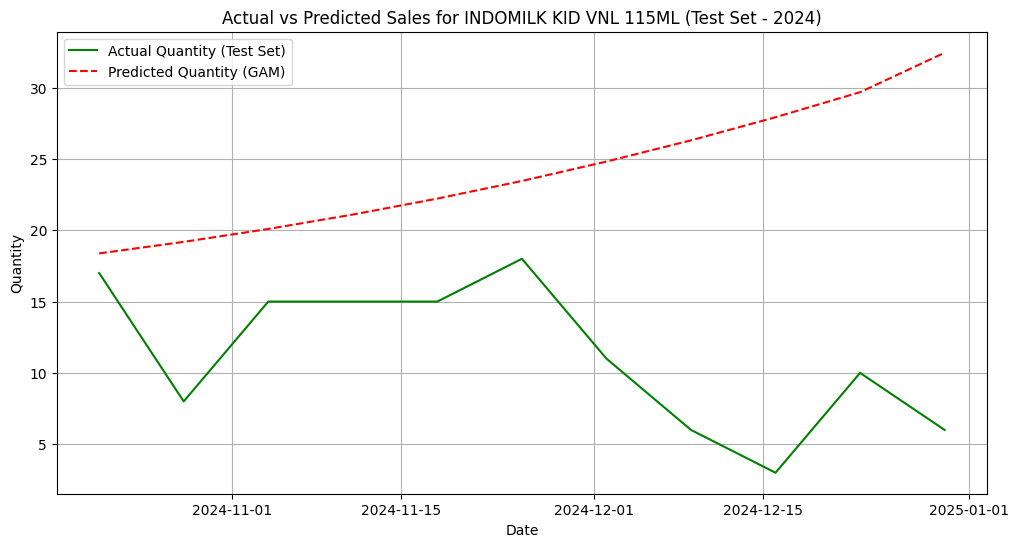


--- Membangun model GAM untuk BISKUAT BOLU CKL 16GR ---
GAM untuk BISKUAT BOLU CKL 16GR berhasil dilatih.
Evaluasi Model BISKUAT BOLU CKL 16GR pada data testing:
  MAPE: 40.74%
  AWMAPE: 53.37%
  MAE: 2.96
  RMSE: 3.87


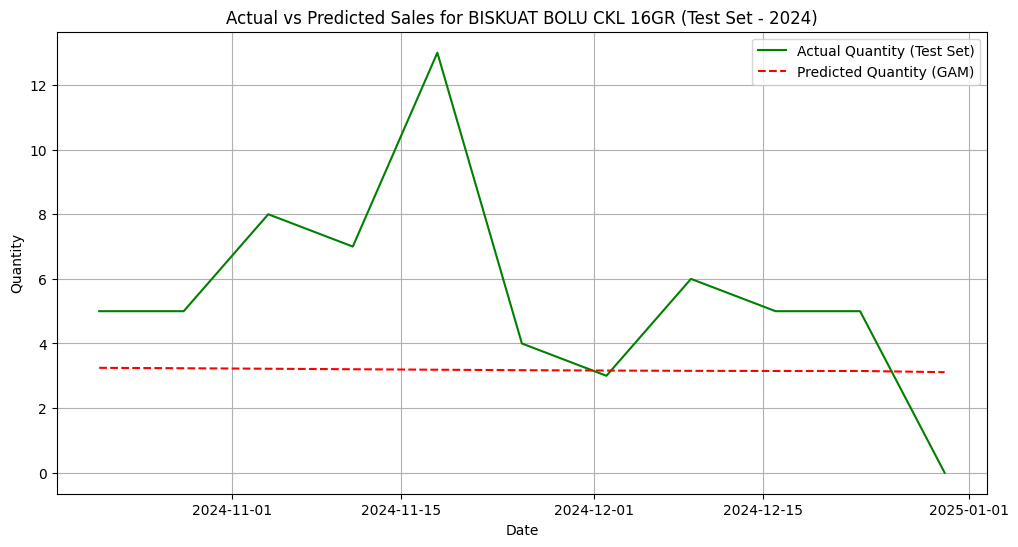


--- Membangun model GAM untuk SAKINAH 1500ML ---
GAM untuk SAKINAH 1500ML berhasil dilatih.
Evaluasi Model SAKINAH 1500ML pada data testing:
  MAPE: 43.75%
  AWMAPE: 48.96%
  MAE: 17.05
  RMSE: 19.84


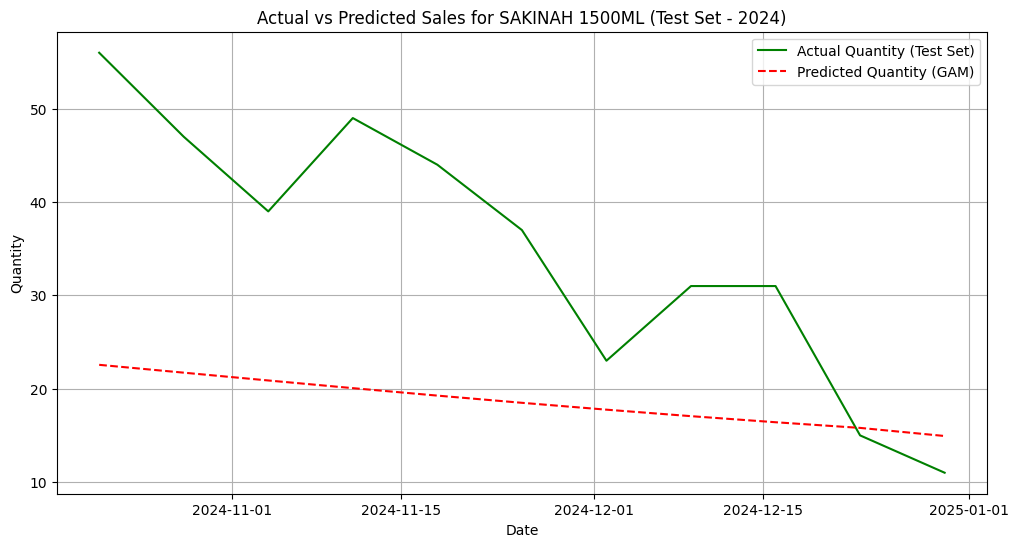


--- Membangun model GAM untuk INDOMILK KID CKL 115ML ---
GAM untuk INDOMILK KID CKL 115ML berhasil dilatih.
Evaluasi Model INDOMILK KID CKL 115ML pada data testing:
  MAPE: 31.38%
  AWMAPE: 34.12%
  MAE: 15.45
  RMSE: 18.50


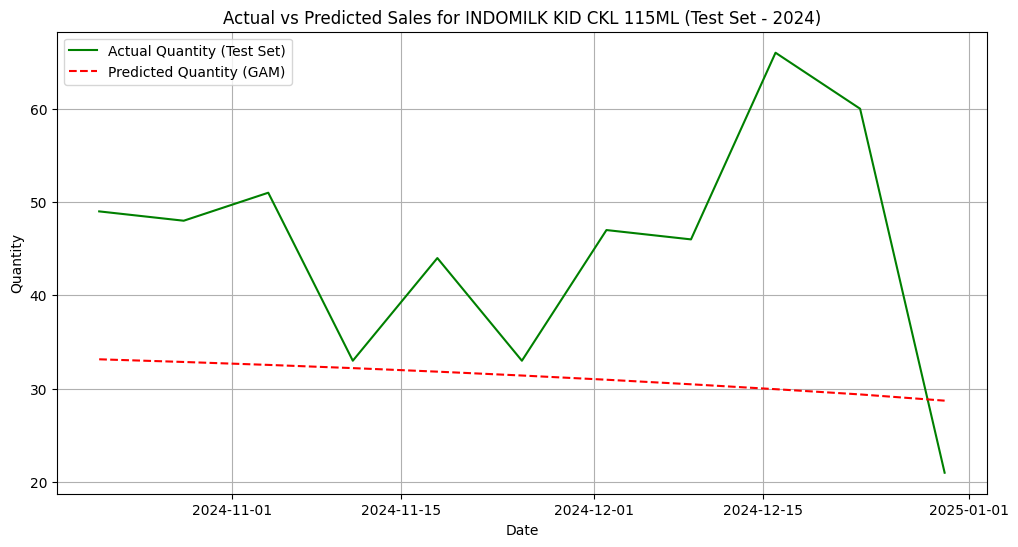


--- Membangun model GAM untuk GATSBY SPL/C DO 175ML ---
GAM untuk GATSBY SPL/C DO 175ML berhasil dilatih.
Evaluasi Model GATSBY SPL/C DO 175ML pada data testing:
  MAPE: 94.28%
  AWMAPE: 95.00%
  MAE: 0.69
  RMSE: 0.92


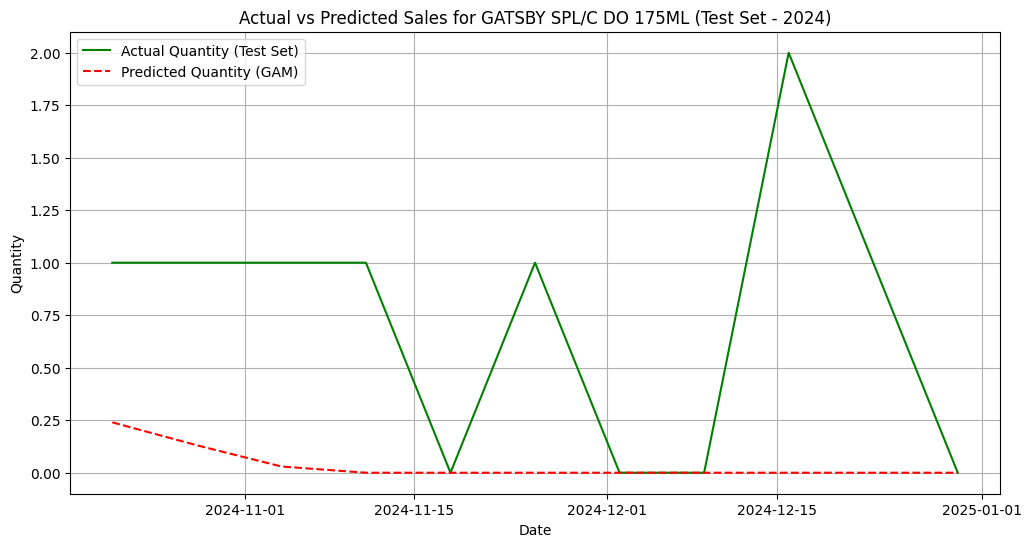


--- Membangun model GAM untuk GATSBY SPL/C GS 175ML ---
GAM untuk GATSBY SPL/C GS 175ML berhasil dilatih.
Evaluasi Model GATSBY SPL/C GS 175ML pada data testing:
  MAPE: 100.00%
  AWMAPE: 100.00%
  MAE: 0.64
  RMSE: 0.90


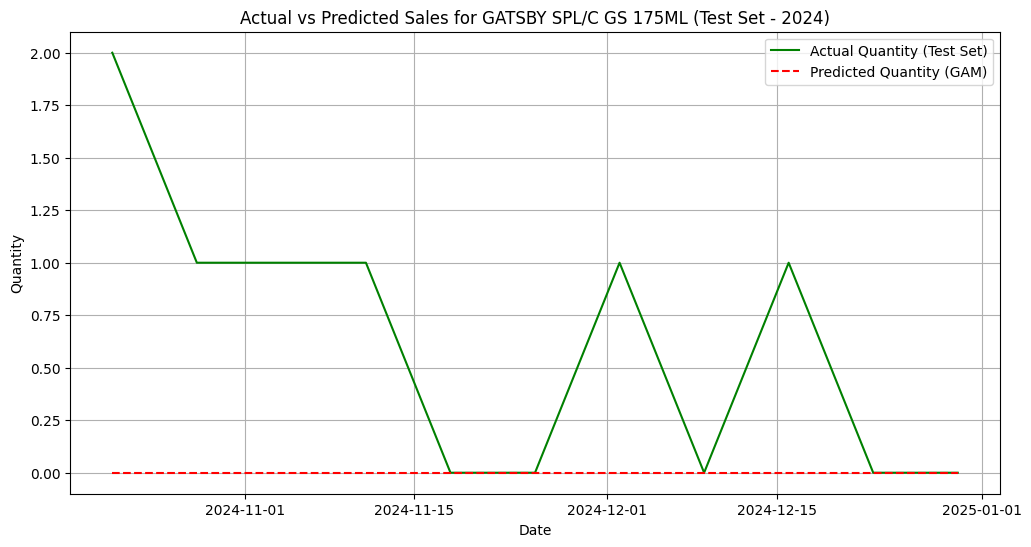


--- Membangun model GAM untuk FRESHCARE ORIGINAL 10ML ---
GAM untuk FRESHCARE ORIGINAL 10ML berhasil dilatih.
Evaluasi Model FRESHCARE ORIGINAL 10ML pada data testing:
  MAPE: 70.83%
  AWMAPE: 94.76%
  MAE: 1.03
  RMSE: 1.20


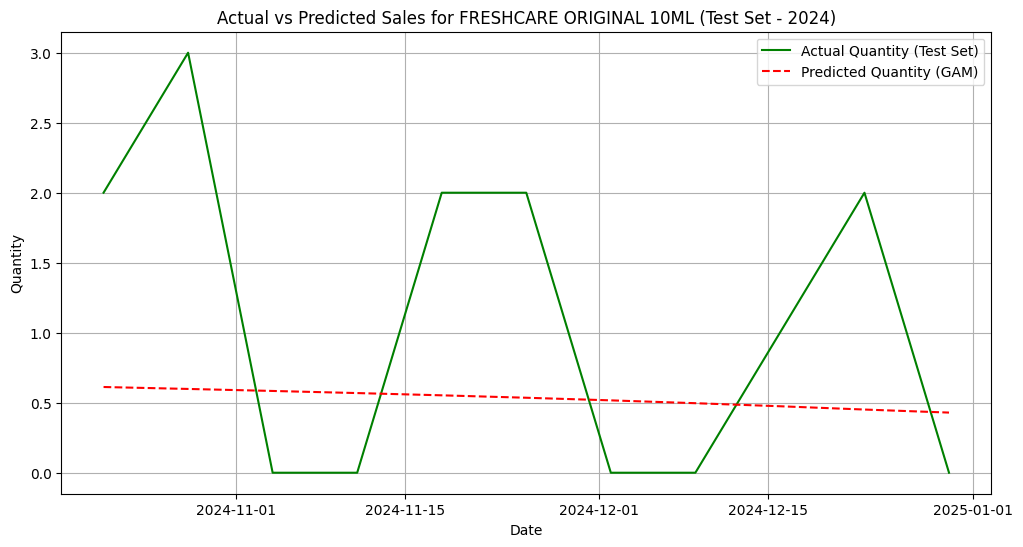


--- Membangun model GAM untuk CLOUD 9 VANILA 15 4G ---
GAM untuk CLOUD 9 VANILA 15 4G berhasil dilatih.
Evaluasi Model CLOUD 9 VANILA 15 4G pada data testing:
  MAPE: 414.63%
  AWMAPE: 230.95%
  MAE: 10.29
  RMSE: 14.29


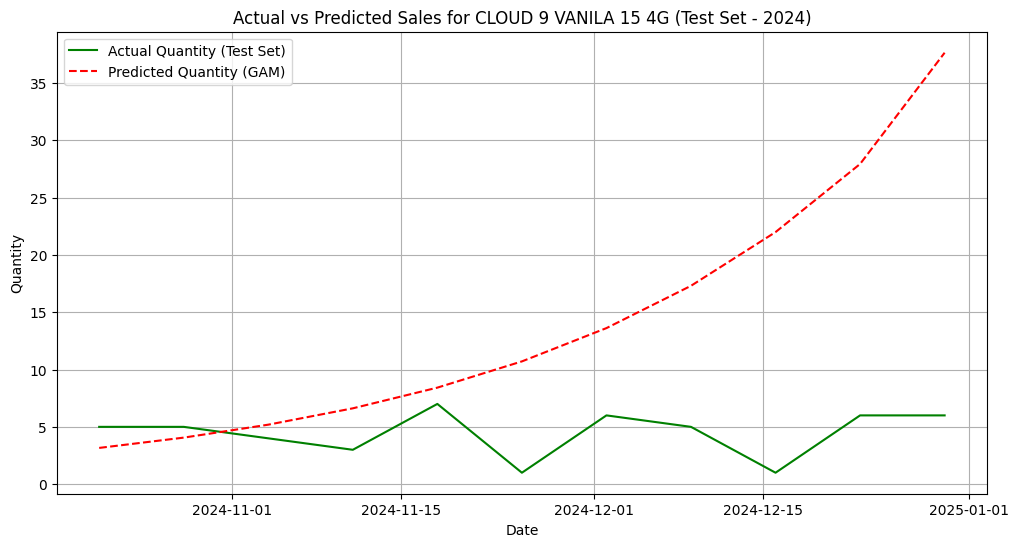


--- Membangun model GAM untuk CLOUD 9 CHOCO 15 4G ---
GAM untuk CLOUD 9 CHOCO 15 4G berhasil dilatih.
Evaluasi Model CLOUD 9 CHOCO 15 4G pada data testing:
  MAPE: 111.73%
  AWMAPE: 109.52%
  MAE: 6.37
  RMSE: 7.47


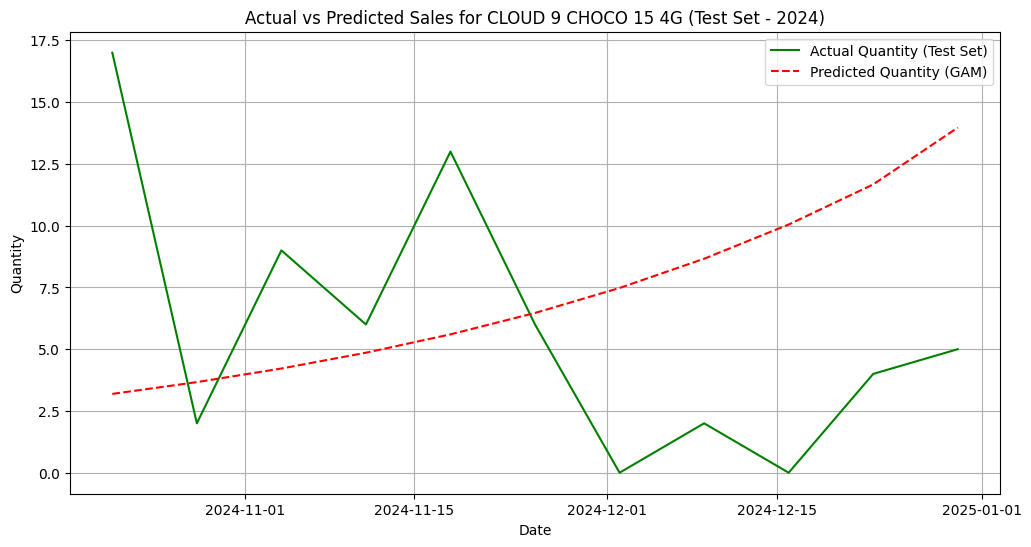


--- Membangun model GAM untuk GREENFIELDS COKLAT 105ML ---
did not converge
GAM untuk GREENFIELDS COKLAT 105ML berhasil dilatih.
Evaluasi Model GREENFIELDS COKLAT 105ML pada data testing:
  MAPE: 100.00%
  AWMAPE: 100.00%
  MAE: 1.91
  RMSE: 3.87


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygam\pygam.py:806: RuntimeWarning:

divide by zero encountered in scalar divide

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygam\pygam.py:806: RuntimeWarning:

invalid value encountered in scalar divide

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2024: RuntimeWarning:

invalid value encountered in divide

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygam\distributions.py:199: RuntimeWarning:

invalid value encountered in divide

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygam\pygam.py:1292: RuntimeWarning:

invalid value encountered in scalar divide



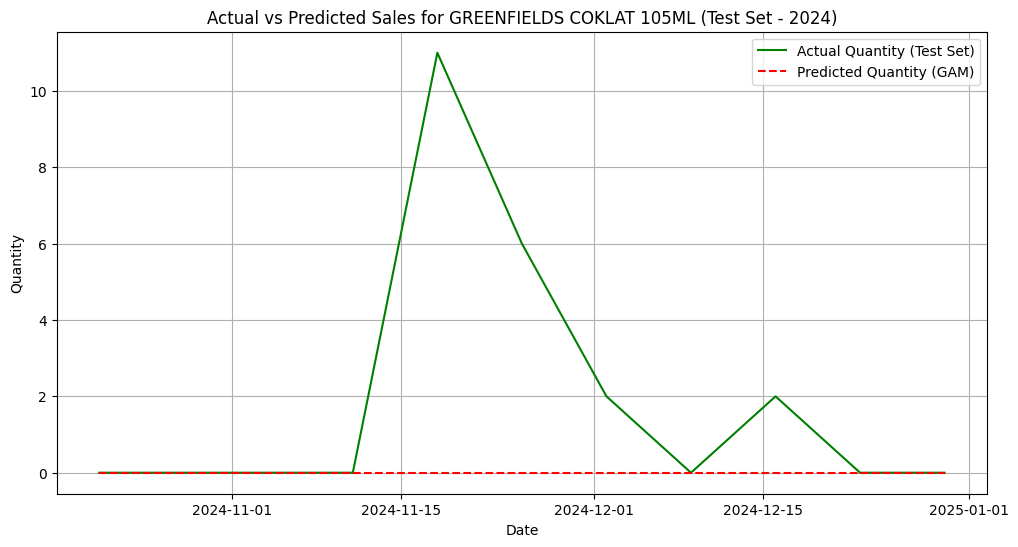


--- Membangun model GAM untuk GREENFIELDS STRAW 105ML ---
did not converge
GAM untuk GREENFIELDS STRAW 105ML berhasil dilatih.
Evaluasi Model GREENFIELDS STRAW 105ML pada data testing:
  MAPE: 100.00%
  AWMAPE: 100.00%
  MAE: 2.09
  RMSE: 3.66


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygam\pygam.py:806: RuntimeWarning:

divide by zero encountered in scalar divide

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygam\pygam.py:806: RuntimeWarning:

invalid value encountered in scalar divide

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2024: RuntimeWarning:

invalid value encountered in divide

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygam\distributions.py:199: RuntimeWarning:

invalid value encountered in divide

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygam\pygam.py:1292: RuntimeWarning:

invalid value encountered in scalar divide



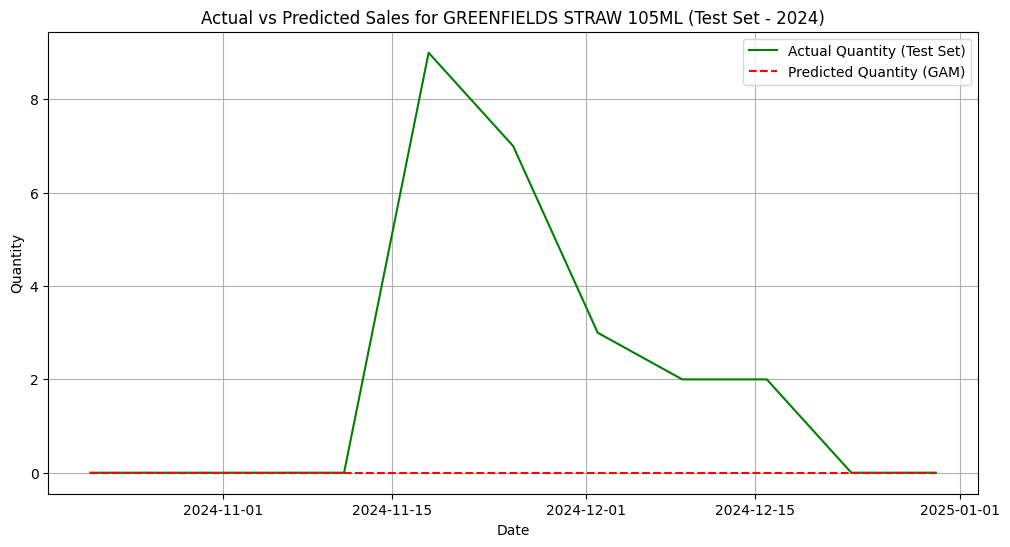

In [19]:
models = {}
predictions_test = {}
evaluation_metrics = {}

features = ['SIN_WEEK', 'COS_WEEK', 'TIME_INDEX']

for item in all_items:
    if item not in df_pivoted.columns:
        print(f"\nSKIPPING: Item '{item}' tidak ditemukan di data penjualan yang dipivot. Lewati.")
        continue

    print(f"\n--- Membangun model GAM untuk {item} ---")
    
    gam = LinearGAM(l(0) +                      # SIN_WEEK
                              l(1) +                      # COS_WEEK
                              s(2, lam=0.5, n_splines=10) # TIME_INDEX
                             )
    
    X_train = df_train[features].values
    y_train = df_train[item].values
    
    if len(y_train) < 2:
        print(f"PERHATIAN: Tidak cukup data training untuk {item} ({len(y_train)} titik). Model tidak dapat dilatih.")
        continue
    
    try:
        y_train_transformed = np.log1p(y_train) # log(1 + QTY)
        # Latih model dengan data yang ditransformasi
        gam.fit(X_train, y_train_transformed)
        models[item] = gam
        print(f"GAM untuk {item} berhasil dilatih.")
    except Exception as e:
        print(f"ERROR: Gagal melatih model GAM untuk {item}. Pesan error: {e}")
        continue

    X_test = df_test[features].values
    y_test = df_test[item].values
    
    if len(y_test) == 0:
        print(f"PERHATIAN: Tidak ada data testing untuk {item}. Tidak dapat melakukan evaluasi.")
        continue

    y_pred = models[item].predict(X_test)
    y_pred = np.expm1(y_pred) # exp(y_pred) - 1
    y_pred[y_pred < 0] = 0 # Pastikan prediksi tidak negatif (penting untuk GAM yang memprediksi log-linier)
    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    wape = weighted_absolute_percentage_error(y_test, y_pred)
    
    evaluation_metrics[item] = {'MAPE': mape, 'AWMAPE': wape, 'MAE': mae, 'RMSE': rmse} # Tambah WAPE di metrics
    
    print(f"Evaluasi Model {item} pada data testing:")
    print(f"  MAPE: {mape:.2f}%")
    print(f"  AWMAPE: {wape:.2f}%") # Tampilkan WAPE
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")

    plt.figure(figsize=(12, 6))
    plt.plot(df_test.index, y_test, label='Actual Quantity (Test Set)', color='green')
    plt.plot(df_test.index, y_pred, label='Predicted Quantity (GAM)', linestyle='--', color='red')
    plt.title(f'Actual vs Predicted Sales for {item} (Test Set - 2024)')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.grid(True)
    plt.show()